## Plot hexagon modulation align EC mean orientation across 4-8 folds

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("talk")

data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/betas/subjects_ifold_testset_EC_betas.csv')
data_clean = pd.DataFrame(columns=['sub_id','ifold','amplitude'])
for sub_ifold_data in data.groupby(['sub_id','ifold']):
    subid = sub_ifold_data[0][0]
    ifold = sub_ifold_data[0][1]
    amplitude = sub_ifold_data[1]['amplitude'].sum()/2
    tmp = {'sub_id':subid,'ifold':ifold,'amplitude':amplitude}
    data_clean = data_clean.append(tmp,ignore_index=True)

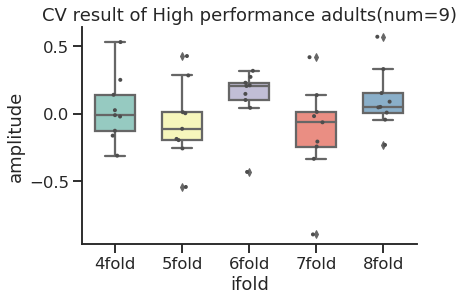

In [60]:
fig, ax = plt.subplots()
sns.boxplot(x='ifold', y="amplitude", data=data_clean, width=.6,palette='Set3')
sns.stripplot(x='ifold', y="amplitude", data=data_clean, size=4, color='.3', linewidth=0)
plt.title("CV result of High performance adults(num=9)")
plt.show()

In [58]:
from scipy.stats import ttest_1samp
for i in range(4,9):
    fold6_act = data_clean.query(f'ifold=="{i}fold"')['amplitude'].to_list()
    _,p = ttest_1samp(fold6_act,0,alternative='greater')
    p = round(p,3)
    if p>0.001:
        print('one sample t-test result of {}fold: pvalue={}'.format(i,p))
    else:
        print('one sample t-test result of {}fold: pvalue<0.001'.format(i))

one sample t-test result of 4fold: pvalue=0.268
one sample t-test result of 5fold: pvalue=0.567
one sample t-test result of 6fold: pvalue=0.051
one sample t-test result of 7fold: pvalue=0.848
one sample t-test result of 8fold: pvalue=0.201
